In [17]:
import tensorflow as tf
import os

In [18]:
base=r'C:\Users\shive\OneDrive\Desktop\DAT'
train_dir=os.path.join(base,'rps')
test_dir=os.path.join(base,'rps-test')
train_paper_dir=os.path.join(train_dir,'paper')
train_rock_dir=os.path.join(train_dir,'rock')
train_scissors_dir=os.path.join(train_dir,'scissors')
test_paper_dir=os.path.join(test_dir,'paper')
test_rock_dir=os.path.join(test_dir,'rock')
test_scissors_dir=os.path.join(test_dir,'scissors')

In [19]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(3,activation='softmax')
    
    
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [21]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255,
                                rotation_range=40,
                                width_shift_range=.2,
                                height_shift_range=.2,
                                shear_range=.2,
                                zoom_range=.2,
                                fill_mode='nearest',
                                horizontal_flip=True
                                
                                )

train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 batch_size=10,
                                                 class_mode='categorical')

test_datagen=ImageDataGenerator(rescale=1.0/255,
                               
                                )

test_generator=test_datagen.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=10,
                                               class_mode='categorical')


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [23]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if logs.get('accuracy')>0.85:
                print('Reached 85% accuracy so cancelling training!')
                self.model.stop_training=True

In [38]:
callbacks=myCallback()
history=model.fit(train_generator,
                    steps_per_epoch=50,
                  epochs=25,
                  validation_data=test_generator,
                  
                  
                  callbacks=[callbacks]
                  )

Epoch 1/25
50/50 [==============================] - 23s 467ms/step - loss: 0.9661 - accuracy: 0.5100 - val_loss: 0.8264 - val_accuracy: 0.7527
Epoch 2/25
50/50 [==============================] - 26s 524ms/step - loss: 0.9221 - accuracy: 0.5860 - val_loss: 0.5153 - val_accuracy: 0.8763
Epoch 3/25
50/50 [==============================] - 26s 522ms/step - loss: 0.8062 - accuracy: 0.6240 - val_loss: 0.4463 - val_accuracy: 0.8495
Epoch 4/25
50/50 [==============================] - 26s 516ms/step - loss: 0.6949 - accuracy: 0.6540 - val_loss: 0.4218 - val_accuracy: 0.9516
Epoch 5/25
50/50 [==============================] - 26s 526ms/step - loss: 0.6194 - accuracy: 0.7500 - val_loss: 0.2665 - val_accuracy: 0.9570
Epoch 6/25
50/50 [==============================] - 25s 508ms/step - loss: 0.5416 - accuracy: 0.7760 - val_loss: 0.2151 - val_accuracy: 0.9785
Epoch 7/25
50/50 [==============================] - 25s 509ms/step - loss: 0.5938 - accuracy: 0.7320 - val_loss: 0.2005 - val_accuracy: 1.0000

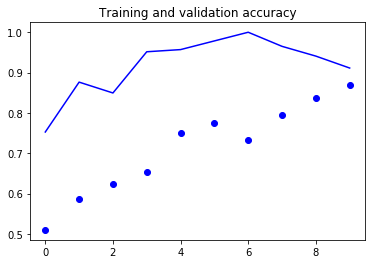

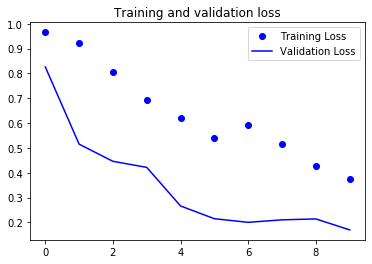

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
path=r'C:\Users\shive\OneDrive\Desktop\DAT'
uploaded=os.path.join(path,'rps-validation')

In [45]:
names=os.listdir(uploaded)
print(names[:10])

['images1.jpg', 'images2.jpg', 'images3.jpg', 'paper-hires1.png', 'paper-hires2.png', 'paper1.png', 'paper2.png', 'paper3.png', 'paper4.png', 'paper5.png']


In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np


for name in names:
    str=r'C:\Users\shive\OneDrive\Desktop\DAT\rps-validation'
    str=str+'\\'+name





    img=image.load_img(str,target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(name[:-4],end=' predicted as ')
    i=np.argmax(classes)
    if i ==0:
        print('paper')
    elif i==1:
        print('rock')
    else:
        print('scissors')

images1 predicted as rock
images2 predicted as rock
images3 predicted as scissors
paper-hires1 predicted as paper
paper-hires2 predicted as paper
paper1 predicted as rock
paper2 predicted as paper
paper3 predicted as scissors
paper4 predicted as paper
paper5 predicted as paper
paper6 predicted as paper
paper7 predicted as paper
paper8 predicted as paper
paper9 predicted as scissors
rock-hires1 predicted as rock
rock-hires2 predicted as rock
rock1 predicted as rock
rock2 predicted as rock
rock3 predicted as rock
rock4 predicted as rock
rock5 predicted as scissors
rock6 predicted as scissors
rock7 predicted as rock
rock8 predicted as rock
rock9 predicted as rock
scissors-hires1 predicted as scissors
scissors-hires2 predicted as scissors
scissors1 predicted as scissors
scissors2 predicted as scissors
scissors3 predicted as scissors
scissors4 predicted as scissors
scissors5 predicted as scissors
scissors6 predicted as scissors
scissors7 predicted as scissors
scissors8 predicted as scissors

In [177]:
path=r'C:\Users\shive\OneDrive\Desktop\DAT'
uploaded=os.path.join(path,'rps-validation')

In [145]:
os.listdir(uploaded)

['paper-hires1.png',
 'paper-hires2.png',
 'paper1.png',
 'paper2.png',
 'paper3.png',
 'paper4.png',
 'paper5.png',
 'paper6.png',
 'paper7.png',
 'paper8.png',
 'paper9.png',
 'rock-hires1.png',
 'rock-hires2.png',
 'rock1.png',
 'rock2.png',
 'rock3.png',
 'rock4.png',
 'rock5.png',
 'rock6.png',
 'rock7.png',
 'rock8.png',
 'rock9.png',
 'scissors-hires1.png',
 'scissors-hires2.png',
 'scissors1.png',
 'scissors2.png',
 'scissors3.png',
 'scissors4.png',
 'scissors5.png',
 'scissors6.png',
 'scissors7.png',
 'scissors8.png',
 'scissors9.png']